# VGG16 Version 2

In [1]:
import os
train_dir = "../Data"
categories = os.listdir(train_dir)
print("Categories found:", categories)

Categories found: ['Benign', 'Malignant']


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
img_height, img_width = 224, 224    # VGG16 input size
batch_size = 32
num_classes = 2  # Binary classification: Benign vs Malignant
epochs = 20

In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% validation split
)


train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Binary classification with 2 classes
    subset='training',
    shuffle=True
)


validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 52002 images belonging to 2 classes.
Found 13000 images belonging to 2 classes.


In [5]:
print(f"Class indices: {train_generator.class_indices}")
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {validation_generator.samples}")

Class indices: {'Benign': 0, 'Malignant': 1}
Number of training samples: 52002
Number of validation samples: 13000


In [6]:
print("Loading VGG16 pre-trained base model...")
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

for layer in base_model.layers:
    layer.trainable = False
print(f"Frozen {len(base_model.layers)} layers of VGG16 base.")

Loading VGG16 pre-trained base model...
Frozen 19 layers of VGG16 base.


In [7]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
print("Model Summary:")
model.summary()

Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
print("\nCompiling model...")
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Compiling model...


In [10]:
checkpoint_filepath = 'best_vgg16_benign_vs_malignant.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_filepath, monitor='val_accuracy', save_best_only=True, verbose=1
)

print(f"\nTraining for {epochs} epochs...")
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[checkpoint]
)

print("\nTraining completed.")
print(f"Best model saved at {checkpoint_filepath}")


Training for 20 epochs...


c:\Users\revna\Desktop\Colab Projects\Cancer_Classification\can_venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8525 - loss: 0.3254
Epoch 1: val_accuracy improved from -inf to 0.61846, saving model to best_vgg16_benign_vs_malignant.h5


1626/1626 ━━━━━━━━━━━━━━━━━━━━ 6460s 4s/step - accuracy: 0.8526 - loss: 0.3253 - val_accuracy: 0.6185 - val_loss: 1.8502
Epoch 2/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9357 - loss: 0.1527
Epoch 2: val_accuracy did not improve from 0.61846
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5158s 3s/step - accuracy: 0.9357 - loss: 0.1527 - val_accuracy: 0.6162 - val_loss: 2.7291
Epoch 3/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9490 - loss: 0.1206
Epoch 3: val_accuracy improved from 0.61846 to 0.62023, saving model to best_vgg16_benign_vs_malignant.h5


1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5226s 3s/step - accuracy: 0.9490 - loss: 0.1206 - val_accuracy: 0.6202 - val_loss: 3.0038
Epoch 4/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9583 - loss: 0.1001
Epoch 4: val_accuracy did not improve from 0.62023
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5214s 3s/step - accuracy: 0.9583 - loss: 0.1001 - val_accuracy: 0.6166 - val_loss: 3.3571
Epoch 5/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9625 - loss: 0.0898
Epoch 5: val_accuracy improved from 0.62023 to 0.62223, saving model to best_vgg16_benign_vs_malignant.h5


1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5211s 3s/step - accuracy: 0.9625 - loss: 0.0898 - val_accuracy: 0.6222 - val_loss: 3.0141
Epoch 6/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9699 - loss: 0.0753
Epoch 6: val_accuracy did not improve from 0.62223
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5156s 3s/step - accuracy: 0.9699 - loss: 0.0753 - val_accuracy: 0.6153 - val_loss: 4.5781
Epoch 7/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9738 - loss: 0.0692
Epoch 7: val_accuracy did not improve from 0.62223
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 4938s 3s/step - accuracy: 0.9738 - loss: 0.0692 - val_accuracy: 0.6188 - val_loss: 3.4590
Epoch 8/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9774 - loss: 0.0574
Epoch 8: val_accuracy improved from 0.62223 to 0.62262, saving model to best_vgg16_benign_vs_malignant.h5


1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5091s 3s/step - accuracy: 0.9774 - loss: 0.0574 - val_accuracy: 0.6226 - val_loss: 3.7109
Epoch 9/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9808 - loss: 0.0513
Epoch 9: val_accuracy did not improve from 0.62262
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5092s 3s/step - accuracy: 0.9808 - loss: 0.0513 - val_accuracy: 0.6225 - val_loss: 4.0173
Epoch 10/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9835 - loss: 0.0437
Epoch 10: val_accuracy did not improve from 0.62262
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5099s 3s/step - accuracy: 0.9835 - loss: 0.0437 - val_accuracy: 0.6219 - val_loss: 4.4410
Epoch 11/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9842 - loss: 0.0404
Epoch 11: val_accuracy did not improve from 0.62262
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5096s 3s/step - accuracy: 0.9842 - loss: 0.0404 - val_accuracy: 0.6217 - val_loss: 4.6107
Epoch 12/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9848 - loss: 0.0391
Epoch 12: 

1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5121s 3s/step - accuracy: 0.9883 - loss: 0.0318 - val_accuracy: 0.6243 - val_loss: 5.6211
Epoch 14/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9888 - loss: 0.0302
Epoch 14: val_accuracy did not improve from 0.62431
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5131s 3s/step - accuracy: 0.9888 - loss: 0.0302 - val_accuracy: 0.6222 - val_loss: 4.7010
Epoch 15/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9898 - loss: 0.0286
Epoch 15: val_accuracy did not improve from 0.62431
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5191s 3s/step - accuracy: 0.9898 - loss: 0.0286 - val_accuracy: 0.6182 - val_loss: 5.9085
Epoch 16/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9905 - loss: 0.0271
Epoch 16: val_accuracy did not improve from 0.62431
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5305s 3s/step - accuracy: 0.9905 - loss: 0.0271 - val_accuracy: 0.6186 - val_loss: 5.8124
Epoch 17/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9895 - loss: 0.0280
Epoch 17

1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5142s 3s/step - accuracy: 0.9927 - loss: 0.0201 - val_accuracy: 0.6246 - val_loss: 5.6690
Epoch 20/20
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9924 - loss: 0.0206
Epoch 20: val_accuracy did not improve from 0.62462
1626/1626 ━━━━━━━━━━━━━━━━━━━━ 5305s 3s/step - accuracy: 0.9924 - loss: 0.0206 - val_accuracy: 0.6192 - val_loss: 6.3391

Training completed.
Best model saved at best_vgg16_benign_vs_malignant.h5


In [11]:
print("\nLoading best model for evaluation...")
model.load_weights(checkpoint_filepath)


Loading best model for evaluation...


Predicting classes on validation data...
407/407 ━━━━━━━━━━━━━━━━━━━━ 1340s 3s/step


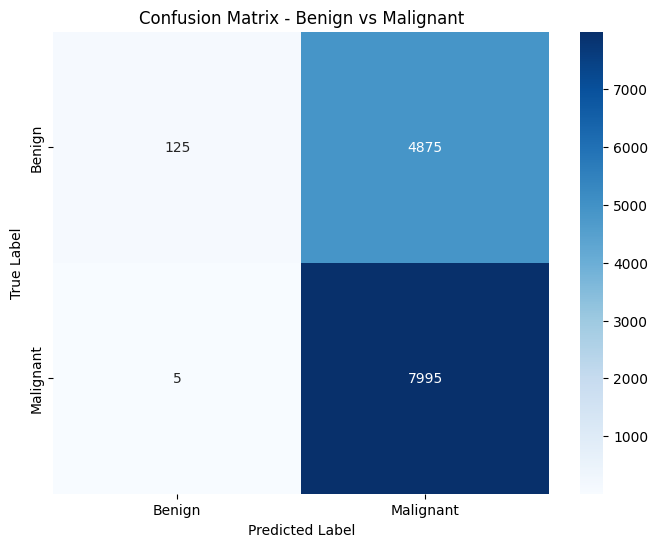

In [12]:
print("Predicting classes on validation data...")

# Reset the generator
validation_generator.reset()

# Predict probabilities for validation data
y_pred_probs = model.predict(validation_generator, steps=len(validation_generator))
y_pred = np.argmax(y_pred_probs, axis=1)


# True labels
y_true = validation_generator.classes[:len(y_pred)]

# Labels for confusion matrix and classification report
class_labels = list(validation_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Benign vs Malignant')
plt.show()

In [13]:
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[ 125 4875]
 [   5 7995]]


In [ ]:
# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)  # Recall for Malignant class
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"\nAdditional Metrics (assuming Malignant is positive class):")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1_score:.4f}")



Additional Metrics (assuming Malignant is positive class):
Sensitivity (Recall): 0.9994
Specificity: 0.0250
Precision: 0.6212
F1-Score: 0.7662


In [15]:
# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6246
